## Simple Linear Regression using Gradient Descent

In [153]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [154]:
train_data = pd.read_csv('train_dataset.csv')
test_data = pd.read_csv('test_dataset.csv')
x = train_data['a'].values
y = train_data['y'].values
x_test = test_data['a'].values
y_test = test_data['y'].values

In [155]:
# def plot_3d_figure(col_a, col_b, col_y):
#     fig = plt.figure()
#     ax = Axes3D(fig)
#     ax.scatter(col_a, col_b, col_y, color='#ef1234', s=10)
#     plt.show()

In [156]:
# plot_3d_figure(train_data.a, train_data.b, train_data.y)

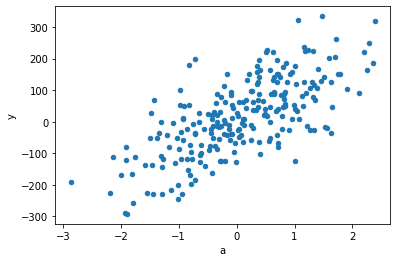

In [157]:
train_data.plot(kind='scatter', x='a', y='y')

Y = $β^{T}$X

In [158]:
# Hypothesis structure(Linear Representation) y = theta0 + (theta1*x)
def hypothesis(theta_coeff, x):
    """
    theta_coeff(array): coefficients of function (1 x num_of_coeff)
    x: input data/variable (num_of_samples x 1)
    
    Returns:
    Predicted value for each example-row in inputs (1 x num_of_inputs)
    """
    return x.dot(theta_coeff)

In [159]:
def cost_function_mse(theta_coeff, x, y):
    """
    theta_coeff(array): coefficients of function (1 x num_of_coeff)
    x: input data/variable (num_of_samples x 1)
    y: output data/variable (num_of_samples x 1)
    
    Returns:
    Computes cost of using theta_coeff as coefficients for Linear Representation wrt to training data
    """
    predicted_y = hypothesis(theta_coeff, x)
    return np.sum((predicted_y - y)**2) / (2*x.shape[0])

In [164]:
def compute_gradient(theta_coeff, x, y):
    """
    theta_coeff(array): coefficients of function (1 x num_of_coeff)
    x: input data/variable (num_of_samples x 1)
    y: output data/variable (num_of_samples x 1)
    
    Returns:
    Array of computed gradients for each of the coefficients (1 x num_of_coefficients)
    """
    predicted_y = hypothesis(theta_coeff, x)
    # coeff_gradients = np.sum(((predicted_y - y)**2) * x.T, axis=1) / (x.shape[0])
    coeff_gradients = np.sum((predicted_y - y) * x.T, axis=1) / (x.shape[0])
    return coeff_gradients

In [165]:
def gradient_descent(x, y, iterations, learning_rate):
    """
    x: input data/variable (num_of_samples x 1)
    y: output data/variable (num_of_samples x 1)
    iterations(int): number of iterations/epochs
    learning_rate(int): alpha or learning rate which controls the descent
    
    Returns:
    theta_coeff(array): Best set of coefficients for the linear model (1 x num_of_coefficients)
    cost_history(array): Cost history wrt to coefficients computed while performing the descent
    """
    # Container to cost history as the descent progresses
    cost_history = []
    
    # Initialize coefficients with random values
    theta_coeff = np.array([0] * x.shape[1])
    
    for iteration in range(iterations):
        # Compute gradient wrt. old theta_coeff
        coeff_gradients = compute_gradient(theta_coeff, x, y)
        # Alter old theta_coeff using movement suggested by new coeff_gradients
        theta_coeff = theta_coeff - (learning_rate * coeff_gradients)
        # Compute the cost of using theta_coeff as coefficients of linear function
        cost = cost_function_mse(theta_coeff, x, y)
        cost_history.append(cost) # Store the new cost
    
    return theta_coeff, cost_history

In [176]:
## Prepare data
# Learning rate
alpha = 0.0001
# Bias variable 
bias_variable = np.ones(len(x))
# Plug input along with bias_variable
x_train = np.column_stack([bias_variable, x])

In [183]:
best_theta_coeff, cost_history = gradient_descent(x_train, y, 25000, alpha)

In [184]:
cost_history[-1]

3662.5707445787243

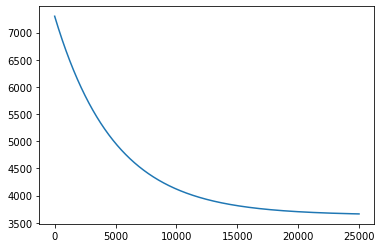

In [185]:
plt.plot(cost_history)

#### Model Evaluation

In [193]:
def get_predictions(theta_coeff, x_input):
    # Bias variable 
    bias_variable = np.ones(len(x_input))
    # Plug input along with bias_variable
    new_x_input = np.column_stack([bias_variable, x_input])
    # Compute output values with new coefficients
    preds = hypothesis(theta_coeff, new_x_input)
    return preds

In [187]:
# RMSE
def rmse(y, y_pred):
    rmse = np.sqrt(np.sum((y - y_pred)**2) / len(y))
    return rmse

In [188]:
# R2 Score
# How much(%) of the total variation in y is explained by variation in x(fitted line)
def r2_score(y, y_pred):  
    mean_y = np.mean(y)
    SE_total_variation = np.sum((y - mean_y)**2) # Unexplained max possible variation in y wrt->Mean
    SE_line_variation = np.sum((y - y_pred)**2) # Unexplained variation in y wrt -> fitted line
    r2 = 1 - (SE_line_variation / SE_total_variation) # Expalined = 1 - Unexplained
    return r2

Training set evaluation

In [194]:
y_pred_train = get_predictions(best_theta_coeff, x)

In [195]:
print(f"RMSE = {rmse(y, y_pred_train)}")
print(f"R2_score = {r2_score(y, y_pred_train)}")

RMSE = 85.58704042761059
R2_score = 0.48779496811963996


Testing set evaluation

In [197]:
y_pred_test = get_predictions(best_theta_coeff, x_test)

In [198]:
print(f"RMSE = {rmse(test_data['y'].values, y_pred_test)}")
print(f"R2_score = {r2_score(test_data['y'].values, y_pred_test)}")

RMSE = 67.88406605409448
R2_score = 0.6589549855994737
